In [1]:
library(readxl)

생계형15 <- read_excel("../Data_SemiProject/생계형15.xls")
생계형16 <- read_excel("../Data_SemiProject/생계형16.xls")
생계형17 <- read_excel("../Data_SemiProject/생계형17.xls")
생계형18 <- read_excel("../Data_SemiProject/생계형18.xls")
생계형19 <- read_excel("../Data_SemiProject/생계형19.xls")


생계형18_02 <- 생계형18[생계형18[,3] != '합계' & 생계형18[,3] != '소계' ,c(1,2,3,12)]


print(colnames(생계형18))

nrow(생계형18)

 [1] "기간"                                            
 [2] "자치구"                                          
 [3] "동"                                              
 [4] "한식 음식점업"                                   
 [5] "용달 및 개별 화물 자동차 운송업"                 
 [6] "부동산 중개 및 대리업"                           
 [7] "의복소매업"                                      
 [8] "생맥주 전문점 및 기타 주점업"                    
 [9] "두발미용업"                                      
[10] "슈퍼마켓 및 기타 음·식료품 위주 종합 소매업"     
[11] "김밥 및 기타 간이 음식점 및 간이음식 포장 판매업"
[12] "커피 전문점 및 기타 비알콜 음료점업"             
[13] "가정용 세탁업"                                   
[14] "노래연습장 운영업"                               
[15] "체인화 편의점"                                   
[16] "치킨전문점"                                      
[17] "자동차 전문 수리업"                              
[18] "채소 과실 및 뿌리작물 소매업"                    
[19] "육류소매업"                                      
[20] "중식음식점업"                                    
[21] "당구장 운영업"                               

[1] 450

In [2]:
bw <- read.table("../Data_SemiProject/2015-2019_business_worker_02.txt")

bw02 <- bw[,1:6]

head(bw02)

write.table(bw02, "../Data_SemiProject/2015-2019_business_worker_03.txt")

년도,자치구명,동,사업체수,총종사자수,총여성종사자수
2015,강남구,개포1동,490,1694,582
2015,강남구,개포2동,902,3466,1988
2015,강남구,개포4동,2403,12402,4077
2015,강남구,논현1동,5770,43779,20314
2015,강남구,논현2동,5731,65282,27341
2015,강남구,대치1동,1013,7103,3974


In [3]:
bw_ <- aggregate(cbind(사업체수, 총종사자수, 총여성종사자수) ~ 자치구명, bw02, sum)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] 3472924 2181671 1996446 1832984 1628679 1331580 1253566 1153334 1146787
[10] 1079103

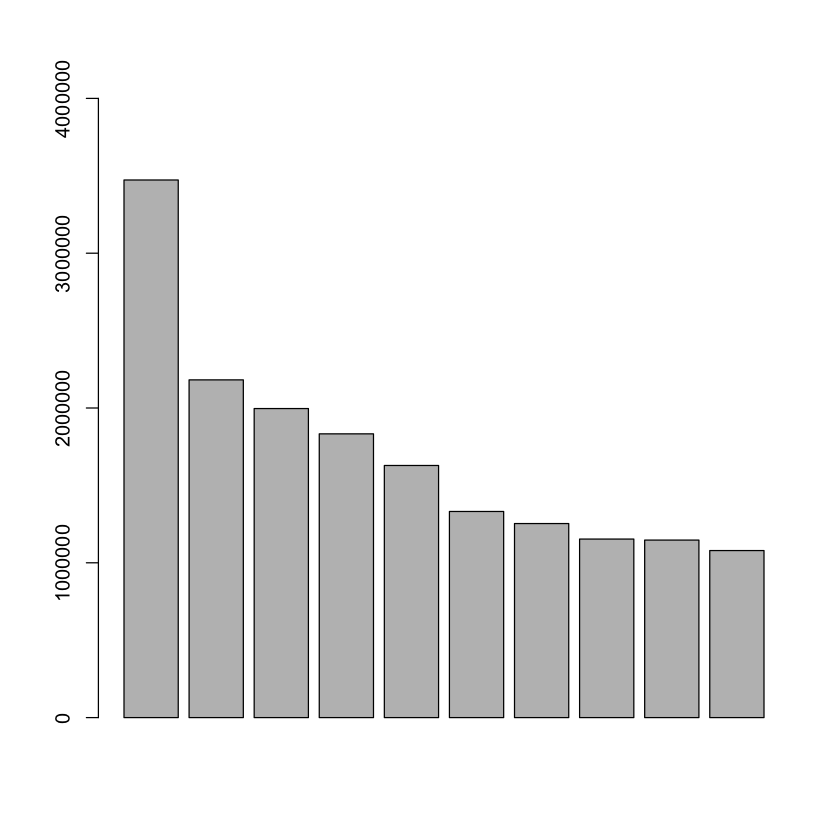

In [4]:
library(dplyr)

options(scipen = 100)

head(arrange(bw_, desc(총종사자수)),10)[,3]

barplot(
    head(arrange(bw_, desc(총종사자수)),10)[,3],
    ylim = c(0, 4000000)
)


In [5]:
seoulAnal <-read.csv("../Data_SemiProject/seoul_analysis.csv")

In [6]:
bw_sa <- cbind(bw02, seoulAnal[,3:6])

In [7]:
str(bw_sa)
head(bw_sa)


'data.frame':	2115 obs. of  10 variables:
 $ 년도          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ 자치구명      : Factor w/ 25 levels "강남구","강동구",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ 동            : Factor w/ 424 levels "가락1동","가락2동",..: 16 17 18 59 60 72 73 74 77 78 ...
 $ 사업체수      : int  490 902 2403 5770 5731 1013 3579 3756 1656 1970 ...
 $ 총종사자수    : int  1694 3466 12402 43779 65282 7103 51945 29049 19542 22083 ...
 $ 총여성종사자수: int  582 1988 4077 20314 27341 3974 21308 12176 8015 8674 ...
 $ 운영평균      : num  102 99 98.5 86 87.5 ...
 $ 폐업평균      : num  48.5 48.5 43 43 43.2 ...
 $ 서울운영평균  : num  94.8 94.8 94.8 94.8 94.8 ...
 $ 서울시폐업평균: num  47 47 47 47 47 47 47 47 47 47 ...


년도,자치구명,동,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2015,강남구,개포1동,490,1694,582,102.0,48.50,94.75,47
2015,강남구,개포2동,902,3466,1988,99.0,48.50,94.75,47
2015,강남구,개포4동,2403,12402,4077,98.5,43.00,94.75,47
2015,강남구,논현1동,5770,43779,20314,86.0,43.00,94.75,47
2015,강남구,논현2동,5731,65282,27341,87.5,43.25,94.75,47
2015,강남구,대치1동,1013,7103,3974,93.0,47.25,94.75,47


In [8]:
write.table(bw_sa, "../Data_SemiProject/2015-2019_business_worker_seoul_analysis.txt")

In [9]:
target <- read.csv("../Data_SemiProject/targetfinal.csv")

head(target)

target$자치구 <- as.character(target$자치구)
target$동 <- as.character(target$동)

str(target)

table(bw_sa$동)

기간,자치구,동,음료점
2015,강남구,개포1동,4
2015,강남구,개포2동,14
2015,강남구,개포4동,31
2015,강남구,논현1동,103
2015,강남구,논현2동,128
2015,강남구,대치1동,25


'data.frame':	2115 obs. of  4 variables:
 $ 기간  : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ 자치구: chr  "강남구" "강남구" "강남구" "강남구" ...
 $ 동    : chr  "개포1동" "개포2동" "개포4동" "논현1동" ...
 $ 음료점: int  4 14 31 103 128 25 87 102 42 40 ...



        가락1동         가락2동        가락본동        가리봉동          가산동 
              5               5               5               5               5 
        가양1동         가양2동         가양3동          가회동         갈현1동 
              5               5               5               5               5 
        갈현2동          강일동         개봉1동         개봉2동         개봉3동 
              5               5               5               5               5 
        개포1동         개포2동         개포4동         거여1동         거여2동 
              5               5               5               5               5 
        고덕1동         고덕2동         고척1동         고척2동          공덕동 
              5               5               5               5               5 
        공릉1동         공릉2동          공항동          광장동          광희동 
              5               5               5               5               5 
         교남동         구로1동         구로2동         구로3동         구로4동 
              5               5               5      

In [10]:
# 신사동_강남, 신사동_관악 구분자

for(i in 1:nrow(target)){
    
    if(target$자치구[i] == '강남구' & target$동[i] == '신사동'){
        
        target$동[i] <- '신사동_강남'
    }else if(target$자치구[i] == '관악구' & target$동[i] == '신사동'){
        
        target$동[i] <- '신사동_관악'
    }
    
}

In [11]:
cafe_seoul_analysis <- cbind(target ,bw_sa[,4:ncol(bw_sa)])

head(cafe_seoul_analysis)

nrow(cafe_seoul_analysis)

str(cafe_seoul_analysis)

summary(cafe_seoul_analysis)

기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2015,강남구,개포1동,4,490,1694,582,102.0,48.50,94.75,47
2015,강남구,개포2동,14,902,3466,1988,99.0,48.50,94.75,47
2015,강남구,개포4동,31,2403,12402,4077,98.5,43.00,94.75,47
2015,강남구,논현1동,103,5770,43779,20314,86.0,43.00,94.75,47
2015,강남구,논현2동,128,5731,65282,27341,87.5,43.25,94.75,47
2015,강남구,대치1동,25,1013,7103,3974,93.0,47.25,94.75,47


[1] 2115

'data.frame':	2115 obs. of  11 variables:
 $ 기간          : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ 자치구        : chr  "강남구" "강남구" "강남구" "강남구" ...
 $ 동            : chr  "개포1동" "개포2동" "개포4동" "논현1동" ...
 $ 음료점        : int  4 14 31 103 128 25 87 102 42 40 ...
 $ 사업체수      : int  490 902 2403 5770 5731 1013 3579 3756 1656 1970 ...
 $ 총종사자수    : int  1694 3466 12402 43779 65282 7103 51945 29049 19542 22083 ...
 $ 총여성종사자수: int  582 1988 4077 20314 27341 3974 21308 12176 8015 8674 ...
 $ 운영평균      : num  102 99 98.5 86 87.5 ...
 $ 폐업평균      : num  48.5 48.5 43 43 43.2 ...
 $ 서울운영평균  : num  94.8 94.8 94.8 94.8 94.8 ...
 $ 서울시폐업평균: num  47 47 47 47 47 47 47 47 47 47 ...


      기간         자치구               동                음료점      
 Min.   :2015   Length:2115        Length:2115        Min.   :  1.00  
 1st Qu.:2016   Class :character   Class :character   1st Qu.: 14.00  
 Median :2017   Mode  :character   Mode  :character   Median : 26.00  
 Mean   :2017                                         Mean   : 39.83  
 3rd Qu.:2018                                         3rd Qu.: 47.00  
 Max.   :2019                                         Max.   :514.00  
    사업체수         총종사자수     총여성종사자수     운영평균     
 Min.   :  154.0   Min.   :   666   Min.   :  211   Min.   : 18.75  
 1st Qu.:  963.5   1st Qu.:  3890   1st Qu.: 1919   1st Qu.: 91.50  
 Median : 1435.0   Median :  6435   Median : 3005   Median : 98.75  
 Mean   : 1943.1   Mean   : 12171   Mean   : 5389   Mean   : 99.53  
 3rd Qu.: 2114.0   3rd Qu.: 11876   3rd Qu.: 5540   3rd Qu.:106.75  
 Max.   :16661.0   Max.   :170886   Max.   :65738   Max.   :170.00  
    폐업평균       서울운영평균    서울시폐업평균 
 Min.   : 27.25

In [12]:
write.csv(cafe_seoul_analysis, "../Data_SemiProject/cafe_seoul_analysis_02.csv", row.names = F)

In [13]:
# 생계
data <- read.csv("../Data_SemiProject/data.csv")
head(data)[,c(4,6,8,11)]

print(colnames(data))

str(data)

nrow(data)

summary(data)

한식음식점업,부동산자문.및.중개업,기타주점업,분식.및.김밥전문점
334,56,91,43
64,2,6,23
27,14,12,11
60,31,27,8
12,10,3,7
28,15,4,2


 [1] "X"                             "기간"                         
 [3] "자치구행정동명"                "한식음식점업"                 
 [5] "용달.및.개별화물.자동차운송업" "부동산자문.및.중개업"         
 [7] "의류점"                        "기타주점업"                   
 [9] "두발미용업"                    "슈퍼마켓"                     
[11] "분식.및.김밥전문점"            "비알콜.음료점"                
[13] "가정용.세탁업"                 "노래연습장.운영업"            
[15] "체인화.편의점"                 "치킨.전문점"                  
[17] "자동차.전문.수리업"            "과실.및.채소소매업"           
[19] "육류.소매업"                   "중국.음식점업"                
[21] "당구장.운영업"                 "제과점업"                     
[23] "컴퓨터게임방.운영업"          
'data.frame':	2115 obs. of  23 variables:
 $ X                            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 기간                         : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ 자치구행정동명               : Factor w/ 424 levels "강남구 개포1동",..: 381 382 380 392 379 378 377 386 387 385 ...
 $ 한식음식점업                 : int  334 64

[1] 2115

       X               기간             자치구행정동명  한식음식점업  
 Min.   :   1.0   Min.   :2015   강남구 개포1동:   5   Min.   :  0.0  
 1st Qu.: 529.5   1st Qu.:2016   강남구 개포2동:   5   1st Qu.: 52.0  
 Median :1058.0   Median :2017   강남구 개포4동:   5   Median : 87.0  
 Mean   :1058.0   Mean   :2017   강남구 논현1동:   5   Mean   :111.8  
 3rd Qu.:1586.5   3rd Qu.:2018   강남구 논현2동:   5   3rd Qu.:140.0  
 Max.   :2115.0   Max.   :2019   강남구 대치1동:   5   Max.   :936.0  
                                 (Other)       :2085                  
 용달.및.개별화물.자동차운송업 부동산자문.및.중개업     의류점       
 Min.   :   0.00               Min.   :  0.00       Min.   :   0.00  
 1st Qu.:  38.00               1st Qu.: 30.00       1st Qu.:  14.00  
 Median :  72.00               Median : 45.00       Median :  25.00  
 Mean   :  86.74               Mean   : 53.89       Mean   :  52.73  
 3rd Qu.: 109.00               3rd Qu.: 66.00       3rd Qu.:  48.00  
 Max.   :1154.00               Max.   :580.00       Max.   :1310.00  
                  

In [14]:
cafe_seoul_analysis$음료점 <- as.numeric(cafe_seoul_analysis$음료점)

In [15]:


head(arrange(cafe_seoul_analysis[cafe_seoul_analysis$기간 == 2015,], desc(음료점)),5)[, 1:7]


기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수
2015,마포구,서교동,491,9736,60674,29805
2015,강남구,역삼1동,387,15116,154595,63195
2015,종로구,종로1.2.3.4가동,368,16072,110407,45435
2015,중구,명동,256,6881,122217,54380
2015,서대문구,신촌동,251,3747,37178,21946


,1,2,3,4,5
사업체수,9736,15116,16072,6881,3747
총종사자수,60674,154595,110407,122217,37178
총여성종사자수,29805,63195,45435,54380,21946


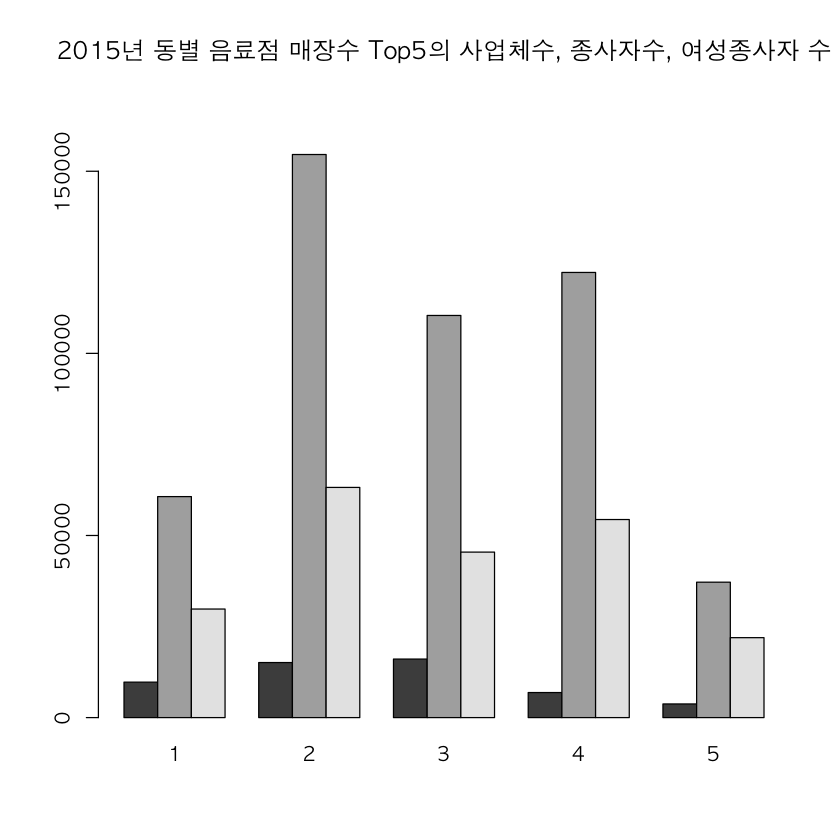

In [54]:
par(family = "AppleGothic")
options(warn = -1)
top5 <- t(head(arrange(cafe_seoul_analysis[cafe_seoul_analysis$기간 == 2015,], desc(음료점)),5)[, 5:7])
top5     

barplot(
        top5,
        main = "2015년 동별 음료점 매장수 Top5의 사업체수, 종사자수, 여성종사자 수",
        beside = T,
        ylim = c(0, 170000),
)

In [51]:
arrange(cafe_seoul_analysis[cafe_seoul_analysis$기간 == 2019& cafe_seoul_analysis$총여성종사자수 > 30000 ,], desc(총종사자수))

기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2019,금천구,가산동,234,16661,170886,60313,88.00,47.50,108.5,53.25
2019,영등포구,영등포본동,31,8132,160633,60484,103.50,55.00,108.5,53.25
2019,강남구,역삼1동,418,15451,155883,65738,98.50,46.50,108.5,53.25
2019,중구,명동,267,6965,110390,50752,138.50,57.00,108.5,53.25
2019,종로구,종로1.2.3.4가동,416,15472,108747,43034,139.25,66.75,108.5,53.25
2019,구로구,구로3동,130,7883,92379,35909,88.75,48.00,108.5,53.25
2019,서초구,서초3동,195,7725,81064,32105,117.00,54.25,108.5,53.25


In [53]:
arrange(cafe_seoul_analysis, desc(운영평균))

기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
2019,송파구,가락1동,12,2988,11391,3717,170.00,147.00,108.50,53.25
2019,중구,을지로동,102,8812,35333,12521,162.00,71.50,108.50,53.25
2018,중구,을지로동,83,9028,32091,11631,159.50,63.25,100.75,50.75
2016,종로구,교남동,8,302,3612,2108,157.75,60.75,95.75,48.50
2017,중구,을지로동,78,9453,32444,11442,157.50,62.25,97.25,49.75
2015,종로구,교남동,6,320,3158,1816,155.25,58.00,94.75,47.00
2019,동대문구,청량리동,27,1614,8267,3904,155.00,60.50,108.50,53.25
2019,은평구,수색동,7,514,2264,781,153.50,68.50,108.50,53.25
2016,중구,을지로동,81,9442,29762,10833,152.50,61.00,95.75,48.50
2019,중구,회현동,111,8566,45216,21794,149.75,68.50,108.50,53.25


In [41]:
# correlation(음료점, 총여성종사자수)
cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$총여성종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$총여성종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$총여성종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$총여성종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$총여성종사자수)


[1] 0.8491096

[1] 0.8510552

[1] 0.7773147

[1] 0.7720956

[1] 0.7712954

In [42]:
# correlation(음료점, 총종사자수)
cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$총종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$총종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$총종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$총종사자수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$총종사자수)

[1] 0.8105852

[1] 0.8141305

[1] 0.7365549

[1] 0.7374483

[1] 0.7338851

In [43]:
# correlation(음료점, 사업체수)
cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2015,]$사업체수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$사업체수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2017,]$사업체수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2018,]$사업체수)

cor(cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2019,]$사업체수)

[1] 0.753892

[1] 0.7587086

[1] 0.7493302

[1] 0.7618033

[1] 0.7657289

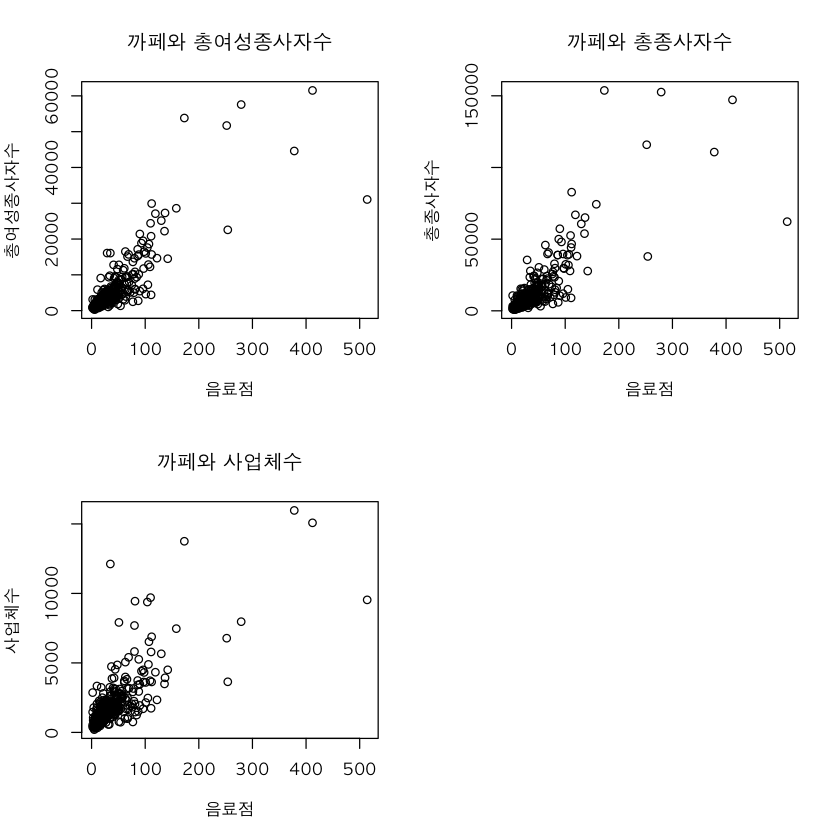

In [71]:
par(family = 'AppleGothic')
par(mfrow = c(2,2))

plot(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$총여성종사자수,
    main = '까페와 총여성종사자수',
     xlab = '음료점',
     ylab = '총여성종사자수',
     
)
plot(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$총종사자수,
     main = '까페와 총종사자수',
     xlab = '음료점',
     ylab = '총종사자수',
     
)
plot(cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$음료점,
    cafe_seoul_analysis[cafe_seoul_analysis$기간==2016,]$사업체수,
     main = '까페와 사업체수',
     xlab = '음료점',
     ylab = '사업체수',
     
)

In [94]:
seoul_business <- read_excel("../Data_SemiProject/RMiniProject/data/서울_사업밀도.xls")

seoul_business <- subset(seoul_business, 자치구 != '합계' & 동 != '합계' & 동 != '소계')


seoul_business <- arrange(seoul_business, 기간, 자치구, 동)

seoul_business <- seoul_business[seoul_business$동 != '둔촌1동',]

In [96]:
head(cafe_seoul_analysis[cafe_seoul_analysis$기간 == 2019,])
table(seoul_business$동)

nrow(seoul_business)

,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
1693,2019,강남구,개포1동,4,169,875,211,120.25,66.75,108.5,53.25
1694,2019,강남구,개포2동,12,737,3056,1706,116.75,55.75,108.5,53.25
1695,2019,강남구,개포4동,33,1884,10524,4084,121.00,52.25,108.5,53.25
1696,2019,강남구,논현1동,122,5309,41829,19953,99.00,48.00,108.5,53.25
1697,2019,강남구,논현2동,161,5596,62264,25557,97.75,49.00,108.5,53.25
1698,2019,강남구,대치1동,26,1068,6451,3602,104.25,52.25,108.5,53.25



        가락1동         가락2동        가락본동        가리봉동          가산동 
              1               1               1               1               1 
        가양1동         가양2동         가양3동          가회동         갈현1동 
              1               1               1               1               1 
        갈현2동          강일동         개봉1동         개봉2동         개봉3동 
              1               1               1               1               1 
        개포1동         개포2동         개포4동         거여1동         거여2동 
              1               1               1               1               1 
        고덕1동         고덕2동         고척1동         고척2동          공덕동 
              1               1               1               1               1 
        공릉1동         공릉2동          공항동          광장동          광희동 
              1               1               1               1               1 
         교남동         구로1동         구로2동         구로3동         구로4동 
              1               1               1      

[1] 423

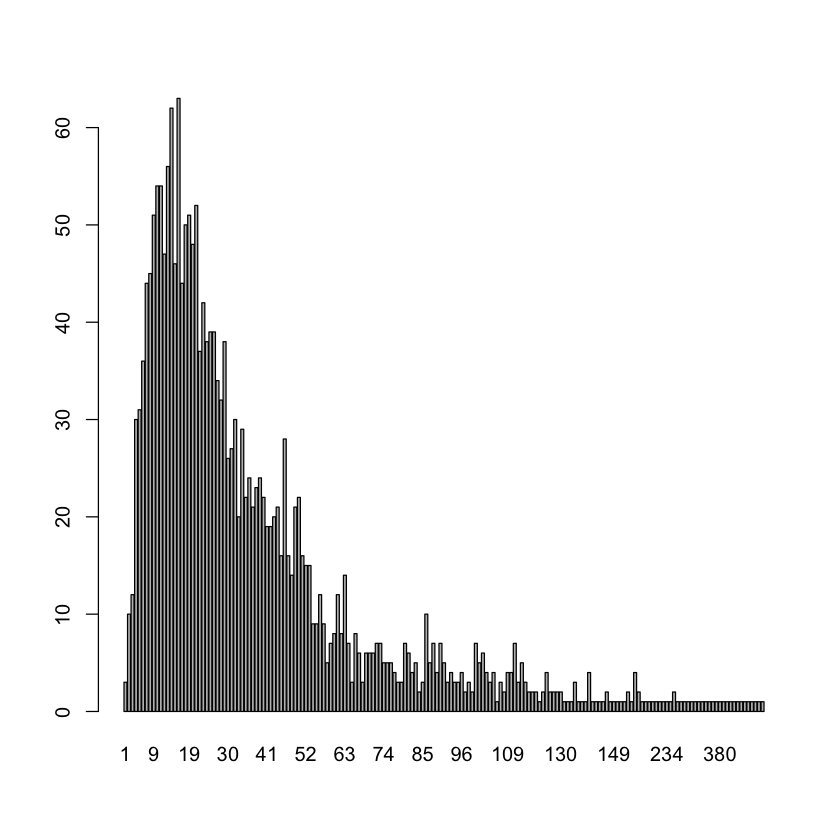

In [98]:
barplot(table(cafe_seoul_analysis$음료점))

In [112]:
sum(subset(cafe_seoul_analysis, 자치구 == '강남구' & 기간 == 2015 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '강남구' & 기간 == 2016 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '강남구' & 기간 == 2017 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '강남구' & 기간 == 2018 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '강남구' & 기간 == 2019 )[,4])

[1] 1672

[1] 1729

[1] 1732

[1] 1804

[1] 1896

In [115]:
sum(subset(cafe_seoul_analysis, 자치구 == '중구' & 기간 == 2015 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '중구' & 기간 == 2016 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '중구' & 기간 == 2017 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '중구' & 기간 == 2018 )[,4])
sum(subset(cafe_seoul_analysis, 자치구 == '중구' & 기간 == 2019 )[,4])

[1] 900

[1] 932

[1] 910

[1] 960

[1] 1023

In [124]:
junggu <- subset(cafe_seoul_analysis, 자치구 == '중구')
junggu
cor(junggu$음료점, junggu$총여성종사자수)
cor(junggu$음료점, junggu$총종사자수)


,기간,자치구,동,음료점,사업체수,총종사자수,총여성종사자수,운영평균,폐업평균,서울운영평균,서울시폐업평균
393,2015,중구,광희동,86,9459,39381,17781,114.75,47.75,94.75,47.0
394,2015,중구,다산동,18,1430,9640,5002,98.00,50.25,94.75,47.0
395,2015,중구,동화동,8,932,3822,1853,93.75,47.25,94.75,47.0
396,2015,중구,명동,256,6881,122217,54380,126.50,51.75,94.75,47.0
397,2015,중구,소공동,141,4208,72671,30735,116.75,60.50,94.75,47.0
398,2015,중구,신당5동,8,1346,3957,2018,96.50,49.50,94.75,47.0
399,2015,중구,신당동,39,12641,29091,16695,115.00,49.00,94.75,47.0
400,2015,중구,약수동,14,906,3524,1796,98.25,49.25,94.75,47.0
401,2015,중구,을지로동,77,10028,30478,10726,148.00,59.25,94.75,47.0
402,2015,중구,장충동,15,908,9553,3859,109.75,53.75,94.75,47.0


[1] 0.96995

[1] 0.9835142

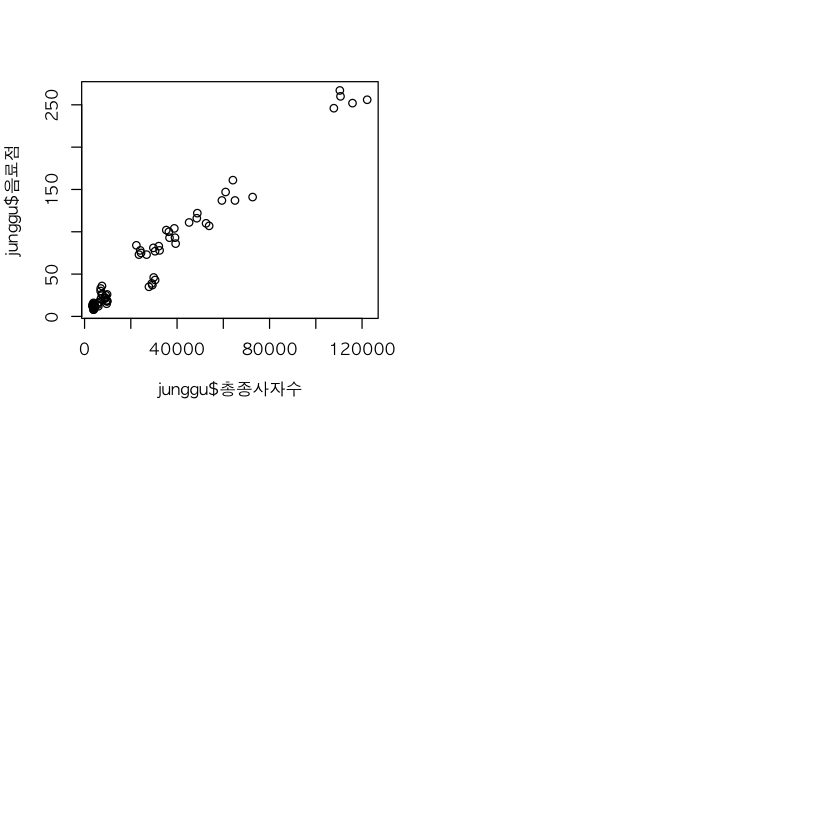

In [129]:
par(family = 'AppleGothic')
par(mfrow = c(2,2))

plot(
    junggu$음료점 ~ junggu$총종사자수
    

)